## Fake News Classifier

## Abstract

Fake news and hoaxes have been there since before the advent of the Internet. The widely accepted definition of Internet fake news is fictitious articles deliberately fabricated to deceive readers. Nowadays, social media admins and news outlets publish fake news to increase readership or as a part of psychological warfare. With the outbreak of one of the greatest Pandemic in the history of earth, we use twitter to show our feelings, emotions and what we feel about the current situations. The media gives us live updates of how the world is dealing with the COVID-19 pandemic. What is happening at the hospitals, how the doctors, nurses and the health workers are helping to fight the disease, how scientists are working day and night in order to create a vaccination to end the pandemic.

The situation is volatile, and it is no surprise that one can easily feel frightened/ panicked in such situations. It is the human tendency to believe what we see, hear and read although most of it being just rumors created by unauthenticated and unvalidated sources. As a result of this, we get more anxious and nervous when we encounter such articles.

To address this issue, we will be designing a classifier that will accurately classify between the real news and fake news.
In our research project, we aim to analyze the news article from the kaggle datasets.  Tweets/articles extracted from twitter related to coronavirus are also used to test the models accuracy . We first extract only the required features from the dataset like title, text and label. After extracting we clean the text data by getting rid of extra whitespaces/alphanumeric characters and null values. Moreover, we stemm the words and convert all letters to lowercase alongside calculating the length of the text article. After doing so, we obliterate stopwords in the text so that the text contains only the more meaningful words that could help us classify between real and fake news. We then vectorize the words using TF-IDF and CountVectorizer retrieving at most 10,000 features after vectorizing.

As a baseline model, we first try to classify the cleaned dataset using the Naïve Bayes classifier with which we get an accuracy score of 65%. We then use Deep Learning to improve on this accuracy using the <b>Long Short Term Memory (LSTM)</b> algorithm with which we attain an accuracy of 94% after hyper-parameter tuning. We also classify using <b>H2O’s AutoML Gradient Boosting Estimator</b> to achieve an accuracy of 81%.

The results of this project will classify between real and reel news which can be very helpful to stop the spread of panic, especially during a pandemic.


## Dataset Details

We have taken 3 datasets for the model. The details of the dataset as the following:-
1. https://www.kaggle.com/c/fake-news/data
2. https://drive.google.com/file/d/1er9NJTLUA3qnRuyhfzuN0XUsoIC4a-_q/view
3. https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset

All the dataset contains different columns, but they have 3 columns in common which are our prime focus. The columns are :- 
a. Text - Contains the actual text qhich we will be using to train the model and predict the fake or real news and test the accuracy
b. Title - Contains the source of the data which we will use to validate the source of the text
c. Label - The actual label of the text. Consists of values 0 and 1 indicating Real and Fake news

<b>Tweets from twitter are used for testing purpose </b>

To get the data from Twitter we are using the API from Twitter Developer account. We are ingesting 500 tweets with the Coronavirus hashtag and from a date range of 10 days.

To run the Jupyter notebook following specifications must be followed

## Specification
Hardware specs: -

1. RAM - 12 GB
2. Memory - 256 GB

For Google Colab - Google account and GPU support

NLP - installing nltk libraries - Details in the notebook<br>

TensorFlow - Keras and Tensorflow installed in the system<br>

H20 - For H20 specific Java and JDK kits must be installed along with H2O, details in the notebook<br>

Twitter Developer Account - Activated with Secret token. Details in notebook

### Importing the necessary modules

In [6]:
#importing the libraries
import numpy as np
import pandas as pd
import pickle


# Machine learning Algorithms
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import numpy as np
import itertools
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import train_test_split

In [2]:
# Run this only when running in google colab
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [1]:
# For running in google Colab
dataset1_path = '/content/drive/My Drive/fake-news/train.csv'
dataset2_path = '/content/drive/My Drive/fake-news (1)/fake.csv'
dataset3_path = '/content/drive/My Drive/news.csv'

In [7]:
# To run in local System - Jupyter Notebook
dataset1_path = r'..\Data\fake-news\train.csv'
dataset2_path = r'..\Data\fake-news (1)\fake.csv'
dataset3_path = r'..\Data\news\news.csv'

In [8]:
dataset1 = pd.read_csv(dataset1_path, index_col=None)
dataset1.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [9]:
dataset2 = pd.read_csv(dataset2_path, index_col=None)
dataset2.head()

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias


In [10]:
dataset3 = pd.read_csv(dataset3_path, index_col=None)
dataset3.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [12]:
req_columns = ['title','text','label']
dataset1 = dataset1[req_columns]
dataset3 = dataset3[req_columns]

In [13]:
dataset2['label']=dataset2['spam_score'].apply(lambda x: 1 if x >0.5 else 0)
dataset2 = dataset2[req_columns]
dataset2.head()

,title,text,label
0,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,0
1,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,0
2,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,0
3,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,0
4,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,1


In [14]:
dataset3['label']=dataset3['label'].apply(lambda x: 1 if x == 'FAKE' else 0)

In [15]:
df1_df2 = dataset1.append(dataset2, ignore_index=True)
df1_df2_df3 = df1_df2.append(dataset3, ignore_index = True)

final_dataset = df1_df2_df3.copy()

final_dataset

,title,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...
40129,State Department says it can't find emails fro...,The State Department told the Republican Natio...,0
40130,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,1
40131,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,1
40132,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",0


## Cleaning the Dataset
We have read the datasets. Now we have to clean the data set. 
<br><br>
<b>
Cleaning is required because: -
</b>

1. The text data is extremely messy. 
2. Lots of noise in the data that needs to be removed
3. Many empty strings
4. NLP techniques does not recognise bad strings because when we will tokenize or vectorize it will not be performing good work on the bad data.</b>

<b>
So Cleaning of data is the first step before natural language processing. It consists of the following substeps:-
</b><br>

1. Checking missing values<br>
2. Removing records whose length is less than 40<br>
3. Removing empty texts

In [17]:
final_dataset.isnull().sum()

title    1238
text       85
label       0
dtype: int64

#### Of the 40134 records, only 85 have missing values, which is 0.2% of the total value, so we can drop these rows. The title is also having missing value which is something we are not concerned about because we are only concerned about the text column which we will clean and based on that we will classify the text.

In [18]:
final_dataset[['title']] = final_dataset[['title']].fillna(value = 'Missing')
final_dataset = final_dataset.dropna()
final_dataset.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [19]:
final_dataset.shape

(40049, 3)

##### Checking the length of the text and adding a column to the dataframe

In [20]:
final_dataset['length'] = final_dataset['text'].apply(lambda x: len(x))
final_dataset.head()

D:\WindowsApplication\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,title,text,label,length
0,House Dem Aide: We Didn’t Even See Comey’s Let...,House Dem Aide: We Didn’t Even See Comey’s Let...,1,4930
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Ever get the feeling your life circles the rou...,0,4160
2,Why the Truth Might Get You Fired,"Why the Truth Might Get You Fired October 29, ...",1,7692
3,15 Civilians Killed In Single US Airstrike Hav...,Videos 15 Civilians Killed In Single US Airstr...,1,3237
4,Iranian woman jailed for fictional unpublished...,Print \nAn Iranian woman has been sentenced to...,1,938


In [21]:
#Checking the maximum and the minimum length
max_length = final_dataset['length'].max()
min_length = final_dataset['length'].min()
print('Max', max_length)
print('Min', min_length)

Max 142961
Min 1


<b> Removing the records in the text column whose length is less than 40. 40 is kept as a standard cut off because any article having less than 40 words will not give us an actual picture that whether the article is a real or fake and most of them are incomplete articles

In [22]:
#Lets see the text fields which has length less than 40

df_potential_discard = final_dataset[final_dataset['length']<40]
df_potential_discard

,title,text,label,length
82,Huma’s Weiner Dogs Hillary,,1,1
169,Mohamad Khweis: Another “Virginia Man” (Palest...,,1,1
173,Trump family already ‘sworn to secrecy’ about ...,Guest Guest,1,17
196,Missing,They got the heater turned up on high.,1,38
295,A Connecticut Reader Reports Record Voter Regi...,,1,1
...,...,...,...,...
39498,"A Fifth Clinton Presidency? Hill, No!",,1,1
39571,Huma’s Weiner Dogs Hillary,,1,1
39863,"Radio Derb: Peak White Guilt, PC Now To The LE...",,1,1
39974,Hillary’s High Crimes & Misdemeanors Threaten ...,,1,1


#### They are mostly empty text, so before removing them we can trim the text and again run the same check to see if the texts are still empty or not and also some text has length of 50000 which is again outliers

In [23]:
final_dataset['text'] =  final_dataset['text'].apply(lambda x : x.strip())
#Checking the length of the text
final_dataset['length'] = final_dataset['text'].apply(lambda x: len(x))
max_length = final_dataset['length'].max()
min_length = final_dataset['length'].min()
print('Max', max_length)
print('Min', min_length)

Max 142961
Min 0


D:\WindowsApplication\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\WindowsApplication\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
# dropping the outliers
final_dataset = final_dataset.drop(final_dataset['text'][final_dataset['length'] < 40].index, axis = 0)
final_dataset

,title,text,label,length
0,House Dem Aide: We Didn’t Even See Comey’s Let...,House Dem Aide: We Didn’t Even See Comey’s Let...,1,4930
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Ever get the feeling your life circles the rou...,0,4160
2,Why the Truth Might Get You Fired,"Why the Truth Might Get You Fired October 29, ...",1,7692
3,15 Civilians Killed In Single US Airstrike Hav...,Videos 15 Civilians Killed In Single US Airstr...,1,3237
4,Iranian woman jailed for fictional unpublished...,Print \nAn Iranian woman has been sentenced to...,1,938
...,...,...,...,...
40129,State Department says it can't find emails fro...,The State Department told the Republican Natio...,0,4076
40130,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,1,14323
40131,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligarc...,1,11973
40132,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",0,6991


#### Saving the Final Dataset as pickle

Pickle is a container in which we can store any model, dataset or text data.<br><br>
Pickle is the standard way of serializing objects in Python. You can use the pickle operation to serialize your machine learning algorithms and save the serialized format to a file. Later you can load this file to deserialize your model and use it to make new predictions.<br><br>
We are saving our dataset in pickle for future reference, if in case one would want to work, they can import this file and start executing Natural Language Processing on the final dataset and can avoid the cleaning and merging steps

In [26]:
final_dataset.to_csv('..\Data\Cleaned_Final_Data\cleaned_dataset.csv')
#Save as pickel
import pickle
final_dataset_pkl_filename = r'..\Data\Pickle_Files\final_dataset.pickel'
final_dataset_pkl = open(final_dataset_pkl_filename, 'wb')
pickle.dump(final_dataset, final_dataset_pkl)
final_dataset_pkl.close()

## Preprocessing the texts 

Data preprocessing is a data mining technique that involves transforming raw data into an understandable format. Real-world data is often incomplete, inconsistent, and/or lacking in certain behaviors or trends, and is likely to contain many errors. Data preprocessing is a proven method of resolving such issues. Data preprocessing prepares raw data for further processing.
<br><br><b>
Pre processing steps includes the following: -</b>

1. Replace all the digits with white space
2. Converting to lower case 
3. Stemming the words in the texts
4. Taking max 10000 features and vectorizing by<br>
  a. TFIDF <br>
  b. CountVectorizer
  
<br>
We are importing <b>NLP libraries</b> for text analysis. For checking the stopwords from the text we are downloading nltk <b>STOPWORDS</b>.
For <b>TfIdf</b> and <b>CountVectorizer</b>, we are using sklearn's feature extraction library to import them. Moreover, we import <b>word_tokenize</b> from nltk library which will be used to tokenize the text data before vectorizing 

In [27]:
# Natural Language Processing libraries
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
nltk.download('stopwords')
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anura\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anura\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
final_dataset.reset_index(inplace=True)

In [29]:
print(final_dataset[0:1]['text'])

0    House Dem Aide: We Didn’t Even See Comey’s Let...
Name: text, dtype: object


### Stemming
Much of natural language machine learning is about sentiment of the text. Stemming is a process where words are reduced to a root by removing inflection through dropping unnecessary characters, usually a suffix. There are several stemming models, including Porter and Snowball.<b> The results can be used to identify relationships and commonalities across large datasets</b>.
Using this method we will get stemmed data to feed the machine learning model through which the model can learn from root words and identify the relationships between words
<br><br>
<b>We are using Porter Stemmer to stem the text data for our dataset</b><br>
The Porter stemming algorithm (or 'Porter stemmer') is a process for removing the commoner morphological and inflexional endings from words in English. Its main use is as part of a <b>term normalisation</b> process

In [0]:
%%time

ps = PorterStemmer()
corpus = []
for i in range(0, len(final_dataset)):
    review = re.sub('[^a-zA-Z]', ' ', final_dataset['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

Wall time: 2h 6min


In [26]:
corpus[0]

'hous dem aid even see comey letter jason chaffetz tweet darrel lucu octob subscrib jason chaffetz stump american fork utah imag courtesi michael jolley avail creativ common licens apolog keith olbermann doubt worst person world week fbi director jame comey accord hous democrat aid look like also know second worst person well turn comey sent infam letter announc fbi look email may relat hillari clinton email server rank democrat relev committe hear comey found via tweet one republican committe chairmen know comey notifi republican chairmen democrat rank member hous intellig judiciari oversight committe agenc review email recent discov order see contain classifi inform long letter went oversight committe chairman jason chaffetz set polit world ablaz tweet fbi dir inform fbi learn exist email appear pertin investig case reopen jason chaffetz jasoninthehous octob cours know case comey actual say review email light unrel case know anthoni weiner sext teenag appar littl thing fact matter ch

<b>We are saving our corpus after stemming in pickle for future reference, if in case one would want to work, they can import this file and start executing nlp techniques like vectorizing and analysis on the corpus and can avoid cleaning and stemming

In [0]:
# Saving the Corpus in pickel
Corpus_pkl_filename = r'..\Data\Pickle_Files\corpus.pickel'
corpus_pkl = open(Corpus_pkl_filename, 'wb')
pickle.dump(corpus, corpus_pkl)
corpus_pkl.close()

This function is used to vectorize the text passed. We are creating this function to remove the redundancy of writing the same code. When we want to vectorize the text using TfIdf, we pass <b>vector = 'TfIDF'</b> and when we want to vectorize using CountVectorizer, we pass <b>vector = 'count'</b> as the input



In [30]:
def nlp_technique(vector):
    X = ''
    vectorizer = ''
    if vector == 'TfIDF':
        vectorizer=TfidfVectorizer(max_features=10000,ngram_range=(1,3))
        X=vectorizer.fit_transform(corpus).toarray()
    if vector == 'count':
        vectorizer = CountVectorizer(max_features=10000,ngram_range=(1,3))
        X = vectorizer.fit_transform(corpus).toarray()
    return X, vectorizer

##### This Function is used to create the confusion matrix by which we can see the true positives, false negatives, true negative and false positive. These values can be used to calculate accuracy, F1 score and Precision. 
(For further explanation refer the evaluation part)

In [31]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

##### This function is used to fit any classification model and calculate the accuracy

In [32]:
def build_model(classifier, X_train, y_train):
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, pred)
    print("accuracy:   %0.3f" % score)
    cm = metrics.confusion_matrix(y_test, pred)
    plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])
    return pred

### TF- IDF
Tf-idf stands for term frequency-inverse document frequency, and the tf-idf weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus.

TF: Term Frequency, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization:

TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).

IDF: Inverse Document Frequency, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following:

IDF(t) = log_e(Total number of documents / Number of documents with term t in it).

In [35]:
## TFidf Vectorizer
X_TfIDF, vectorizer = nlp_technique('TfIDF')
vectorizer.get_feature_names()[:20]

['aaron',
 'abandon',
 'abbott',
 'abc',
 'abc news',
 'abduct',
 'abdullah',
 'abe',
 'abedin',
 'abid',
 'abil',
 'abl',
 'abl get',
 'abnorm',
 'aboard',
 'abolish',
 'aborigin',
 'abort',
 'abort right',
 'abraham']

In [38]:
vectorizer.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 10000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [39]:
y=final_dataset['label']

In [40]:
visual_df = pd.DataFrame(X_TfIDF, columns=vectorizer.get_feature_names())
visual_df.head()

,aaron,abandon,abbott,abc,abc news,abduct,abdullah,abe,abedin,abid,...,zika viru,zionism,zionist,zombi,zone,zone syria,zoo,zu,zuckerberg,zulu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
# USed to Pickel the X variable 
# X_var_pkl_filename = r'..\Data\Pickle_Files\X_var_TFIDF.pickel'
# X_var_pkl = open(X_var_pkl_filename, 'wb')
# pickle.dump(X, X_var_pkl)
# X_var_pkl.close()

### Naive Bayes Algorithm
Naive Bayes classification makes use of Bayes theorem to determine how probable it is that an item is a member of a category. In our use we will use it to determine if a news article belongs to the real or fake category.<br><br>
To run a Naive Bayes classifier in Scikit Learn, the categories must be numeric, so I assigned the label “1” to all fake news and the label “0” to all real news<br><br>
A Naive Bayes classifier needs to be able to calculate how many times each word appears in each document and how many times it appears in each category.Basically a matrix format where each row represents a document and each column represents a word.  Eg .[0,1,1,0,.....] [0,0,1,1….]<br><br>
To get our news articles in a matrix format, we can use Scikit Learn’s CountVectorizer. CountVectorizer creates a vector of word counts for each article to form a matrix. Each index corresponds to a word and every word appearing in the article is represented.<br><br>
We then create a dataframe of the word counts on which we train our Multinomial Naive Bayes Classifier model.<br><br>
We have used the confusion matrix as our metric to evaluate the Naive Bayes model
<br><br>
<b> Train Test Split</b><br>
Now we can split the data into train and test using Sklearn's test train split. We split the data into 75% train and 25% test

In [43]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_TfIDF, y, test_size=0.25, random_state=0)

<b>Baseline multinomial Naive Bayes classifier.</b><br>
<br>
With the TF-IDF Vectorizer we want to check the accuracy with normal Machine Learning model. We are using Naive Bayes to classify the text to predict if it is a Fake News or Real News
<br>
<br>
After prediction we are printing the confusion matrix.
We are using Confusion matrix as a performance indicator

accuracy:   0.650
Confusion matrix, without normalization


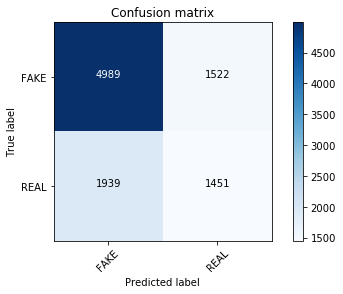

In [44]:
classifier=MultinomialNB()
y_pred = build_model(classifier, X_train,y_train)

### Model Performance

Model is trained with the vectorized words using TfIDF and evaluated against the test data

We are measuring the accuracy score of the model as the performance indicator.

The accuracy of the Baseline Multinomial Naive Bayes model is <b>65%

D:\WindowsApplication\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


accuracy:   0.571
Confusion matrix, without normalization


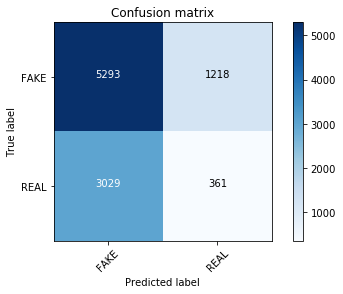

In [47]:
linear_clf = PassiveAggressiveClassifier(n_iter=50)
pred_pas = build_model(linear_clf, X_train,y_train)

### Model Performance

Model is trained with the vectorized words using TfIDF and evaluated against the test data

We are measuring the accuracy score of the model as the performance indicator.

The accuracy of the Baseline Passive aggressive classifier model is <b>57%

### CountVectorizer
The CountVectorizer provides a simple way to both tokenize a collection of text documents and build a vocabulary of known words, but also to encode new documents using that vocabulary.

You can use it as follows:

1. Create an instance of the CountVectorizer class.
2. Call the fit() function in order to learn a vocabulary from one or more documents.
3. Call the transform() function on one or more documents as needed to encode each as a vector.
An encoded vector is returned with a length of the entire vocabulary and an integer count for the number of times each word appeared in the document.

In [0]:
## Count Vectorizer
X_Count, vectorizer = nlp_technique('count')

In [0]:
vectorizer.get_feature_names()[:20]

['aa',
 'aaron',
 'aaron klein',
 'ab',
 'abadi',
 'abandon',
 'abba',
 'abbott',
 'abc',
 'abc news',
 'abd',
 'abdel',
 'abduct',
 'abdul',
 'abdullah',
 'abe',
 'abedin',
 'abedin email',
 'aber',
 'abet']

In [0]:
vectorizer.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 15000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [0]:
y=final_dataset['label']

In [0]:
visual_df = pd.DataFrame(X_Count, columns=vectorizer.get_feature_names())
visual_df.head()

,aa,aaron,aaron klein,ab,abadi,abandon,abba,abbott,abc,abc news,...,zionism,zionist,zip,zombi,zone,zone syria,zoo,zu,zuckerberg,zulu
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<b>Baseline multinomial Naive Bayes classifier.</b><br>
<br>
With the Count Vectorizer we want to check the accuracy with normal Machine Learning model. We are using Naive Bayes to classify the text to predict if it is a Fake News or Real News
<br>
<br>
After prediction we are printing the confusion matrix.
We are using Confusion matrix as a performance indicator

In [0]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_Count, y, test_size=0.25, random_state=0)

accuracy:   0.657
Confusion matrix, without normalization


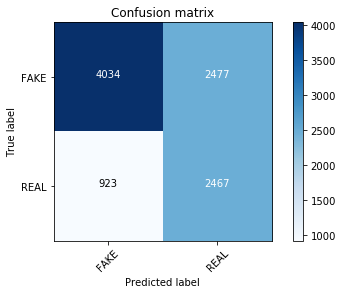

In [0]:
classifier=MultinomialNB()
build_model(classifier, X_train,y_train)

### Model Performance

Model is trained with the vectorized words using Count Vectorizer and evaluated against the test data

We are measuring the accuracy score of the model as the performance indicator.

The accuracy of the Baseline multinomial Naive Bayes model is <b>65.7%

D:\WindowsApplication\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


accuracy:   0.551
Confusion matrix, without normalization


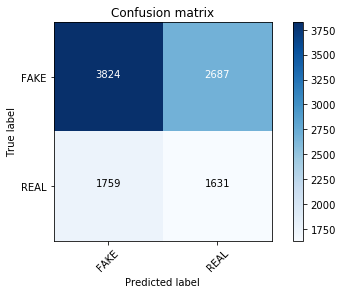

In [0]:
linear_clf = PassiveAggressiveClassifier(n_iter=50)
build_model(linear_clf, X_train,y_train)

### Model Performance

Model is trained with the vectorized words using Count Vectorizer and evaluated against the test data

We are measuring the accuracy score of the model as the performance indicator.

The accuracy of the Baseline Passive aggressive classifier model is <b>55.1%

## Long Short Term Memory (LSTM)

### Overview
Long Short Term Memory networks – usually just called “LSTMs” – are a special kind of RNN, capable of learning long-term dependencies. Unlike standard feedforward neural networks, LSTM has feedback connections. It can not only process single data points like image data, it can also process sequence of data like speech detection and Spam/ Fake News classifier.

Since Naive Bayes Classifier and Passive Aggressive Classifier did not yield the expected result, we will use LSTM to try and improve the accuracy.
As mentioned above the LSTM works on both feed forwarding and back propagation to learn from the data and can measure the sentiment of a text, so deep neural network can be a better approach to predict real or fake news and this could help in yielding better accuracy
<br>
<br>
### Environment
To use the LSTM Model we need to install Tensorflow in the system.
We can use <b>!pip install tensorflow</b> and install the tensorflow. Then we are importing different libraries like Tokenizer which is used to tokenize the text data.<b> Pad_sequence</b> is used to evenly shape the features and the labels.

In [0]:
# importing neural network libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, GRU, LSTM, RNN, SpatialDropout1D

In [48]:
#### Cleaning the dataset to remove any anomalies
final_dataset = dataset1.copy()
final_dataset[['title']] = final_dataset[['title']].fillna(value = 'Missing')
final_dataset = final_dataset.dropna()
final_dataset.isnull().sum()

final_dataset['length'] = final_dataset['text'].apply(lambda x: len(x))
final_dataset['text'] =  final_dataset['text'].apply(lambda x : x.strip())
final_dataset = final_dataset.drop(final_dataset['text'][final_dataset['length'] < 40].index, axis = 0)

Before defining the network, we need to tokenize the texts. We are using <b>Tensorflow Tokenize function</b> to tokenize the texts and sequence the text data to get the X variable.<br>
X - Predictor Variables<br>
Y - Target Variable<br>
<br>X will have the tokenized words in sequence<br>
<br>
Tokenizing the text includes converting the words, letters into counts or numbers. <br>
We do not explicitly remove the punctuations.This is taken care by an inbuilt option in Tokenizer

In [0]:
max_features = 5000
tokenizer = Tokenizer(num_words = max_features, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower = True, split = ' ')
tokenizer.fit_on_texts(texts = final_dataset['text'])
X = tokenizer.texts_to_sequences(texts = final_dataset['text'])

In [0]:
# now applying padding to make them even shaped.
X = pad_sequences(sequences = X, maxlen = max_features, padding = 'pre')

In [0]:
y = final_dataset['label']

In [0]:
# splitting the data training data for training and Test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

### Defining the Network
The Network in keras is defined as a sequence of layer. The sequential class is the container for these layers.
The LSTM recurrent layer comprises of memory units called the LSTM. <br>

<b>Embedding Layer</b> - The Embedding layer is defined as the first hidden layer of a network. The following parameters of the embedding layers must be defined
1. input_dim: This is the size of the vocabulary in the text data. For example, if the data is integer encoded to values between 0-10, then the size of the vocabulary would be 11 words.
2. output_dim: This is the size of the vector space in which words will be embedded. It defines the size of the output vectors from this layer for each word. For example, it could be 32 or 100 or even larger. Test different values for your problem.

<b>LSTM Layer</b> - This layer consists of LSTM unit. It is composed of a cell, an input gate, an output gate and a forget gate <br><br>
<b>Dropout Layer</b> - Dropout is a regularization technique for reducing overfitting in neural networks by preventing complex co-adaptations on training data. <br><br>
<b>Dense Layer</b> - A fully connected layer that often follows LSTM layers and is used for outputting a prediction is called Dense.<br>

<b>Steps to define the neural network:</b> -<br>
    
1. The first step is to create the instance of the sequence class. After defining the sequence class, we create the layer and add those to this sequence class. We are naming the class as lstm_nn_model<br>
2. The first layer is the <b>input layer</b>. In this layer we are embedding the input features and the output dimensions to form the first layer for the neural network model.<br>
3. The second layer is the <b>hidden LSTM layer</b>. The LSTM unit contains the following<br>
    a. Dropout rate is 0.3 - Drop<br>
    b. Recurrent dropout rate is 0.2<br>
    c. units training = 1<br>
4. The third layer is a <b>simple dropout layer</b> which will help in reducing oberfitting by dropping 0.4 features<br>

5. The fourth layer is the <b>Dense layer</b> of LSTM units. In this layer we are applying an activation function - <b>tanh</b><br>
6. The fifth layer is again a simple <b>dropout layer</b> with 0.5% drop out rate<br>
7. The last layer is the <b>output layer</b>. In the output layer we using another activation function <b>Softmax</b> and setting the output neurons to be 2.

In [0]:
lstm_model = Sequential(name = 'lstm_nn_model')
lstm_model.add(layer = Embedding(input_dim = max_features, output_dim = 120, name = '1st_layer'))
lstm_model.add(layer = LSTM(units = 100, dropout = 0.3, recurrent_dropout = 0.2, name = '2nd_layer'))
lstm_model.add(layer = Dropout(rate = 0.4, name = '3rd_layer'))
lstm_model.add(layer = Dense(units = 120,  activation = 'tanh', name = '4th_layer'))
lstm_model.add(layer = Dropout(rate = 0.5, name = '5th_layer'))
lstm_model.add(layer = Dense(units = len(set(y)),  activation = 'softmax', name = 'output_layer'))
# compiling the model


### Compile the Network
After we define the neural network it should compile.<br>
<br>
This is an efficiency step. It transforms the simple layer that we define into highly complex efficient series of matrix transforms and in a format which is intended to be executed in GPU or CPU. <br>
Compilation requires a number of parameters to be specifically tailored to train the model. Specifically the optimization function and the loss function to evaluate the network which is minimized by the algorithm.<br><br>

Perhaps the most commonly used <b>optimization</b> algorithms because of their generally better performance are:

1. <b>Stochastic Gradient Descent, or ‘sgd‘</b>, that requires the tuning of a learning rate and momentum.
2. <b>ADAM, or ‘adam‘</b>, that requires the tuning of learning rate.
3. <b>RMSprop, or ‘rmsprop‘<b>, that requires the tuning of learning rate.

Here in our compilation we are using <b>"Stocastic Gradient Descend"</b> Optimizer and <b>"Sparse Categorical Cross entropy"</b> as the cost function and we are measuring the <b>accuracy</b> after each time the neural network is trained.

In [ ]:
lstm_model.compile(optimizer = 'sgd', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

### Splitting the data 
We are splitting the data into Test and Validation. We will be using the validation set to calculate the validation accuracy during training the model.

In [0]:
# splitting the data training data for Validation and Test.
X_Val, X_test, y_Val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 101)

### Fit the Network
Once the Network is compiled it is ready to accept the weights on the training dataset. <br><br>
Fitting the network requires the training data to be specified, both a matrix of input patterns, X, and matching output patterns, y.<br><br>
The network is trained using the LSTM algorithm and optimized according to the optimization algorithm and loss function specified when compiling the model.
<br><br>
The LSTM algorithm requires that the network be trained for a specified number of epochs or exposures to the training dataset.
<br><br>
Each epoch can be partitioned into groups of input-output pattern pairs called batches. This defines the number of patterns that the network is exposed to before the weights are updated within an epoch. It is also an efficiency optimization, ensuring that not too many input patterns are loaded into memory at a time.
<br><br>
We are trainig the model to an epoch of 3. We are also provinding the validation dataset that we created to get the accuracy in the validation data.

In [0]:
lstm_model_fit = lstm_model.fit(X_train, y_train, epochs = 3, validation_data=(X_Val, y_Val))

Epoch 1/3
467/467 [==============================] - 8784s 19s/step - loss: 0.6835 - accuracy: 0.5548 - val_loss: 0.6794 - val_accuracy: 0.5533
Epoch 2/3
467/467 [==============================] - 8891s 19s/step - loss: 0.6749 - accuracy: 0.5547 - val_loss: 0.6682 - val_accuracy: 0.5533
Epoch 3/3
467/467 [==============================] - 8955s 19s/step - loss: 0.6585 - accuracy: 0.5776 - val_loss: 0.6444 - val_accuracy: 0.6047


### Evaluate the Network
Once the model is trained we can evaluate the model. <br><br>
The network is trained on training data so it do not give clear picture of the accuracy on the training dataset. So we are using the validation dataset to measure the accuracy. The validation dataset is the data that the model has never seen before.So if it performs well then we can say that the model is good.<br><br>
After training the model we get an accuracy of 57.76 % after 3 epochs in the training dataset and an accuracy of 60.4 % in the validation data.<br><br>
Clearly the accuracy is not good enough. So will train the hyper parameters to find the best parameters keeping the performance metrics as accuracy

### Hyper-Parameter Tuning
##### Tuning the network Layers

1. The first layer is kept same. As this is the input layer, we are taking all the features and the data as the input<br>
2. The Second layer -Dropout is changed to 0.2 i.ee leaving out 20% of the inputs and feeding the neural network
3. The third layer - Dropout changed to 50%. To prevent overfitting
4. Fourth layer - In this layer we changed the activation function to RELU. Relu would help in solving the problem of Vanishing Gradient.
5. Fifth layer - We are keeping this same
6. Output layer - The activation is changed to Sigmoid - Which is used for classification. Sigmoid gives 0 or 1 so it is Sigmoid would perform better that Softmax

With this we will train our model again

In [15]:
# LSTM Neural Network
lstm_model = Sequential(name = 'lstm_nn_model')
lstm_model.add(layer = Embedding(input_dim = max_features, output_dim = 120, name = '1st_layer'))
lstm_model.add(layer = LSTM(units = 120, dropout = 0.2, recurrent_dropout = 0.2, name = '2nd_layer'))
lstm_model.add(layer = Dropout(rate = 0.5, name = '3rd_layer'))
lstm_model.add(layer = Dense(units = 120,  activation = 'relu', name = '4th_layer'))
lstm_model.add(layer = Dropout(rate = 0.5, name = '5th_layer'))
lstm_model.add(layer = Dense(units = len(set(y)),  activation = 'sigmoid', name = 'output_layer'))

The compilation function is also tuned. In place of Stochastic Gradient Descend we are using <b>Adam</b> optimizer

In [ ]:
# compiling the model
lstm_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [16]:
lstm_model_fit = lstm_model.fit(X_train, y_train, epochs = 4, validation_data=(X_Val, y_Val))

Epoch 1/4
467/467 [==============================] - 8626s 18s/step - loss: 0.3478 - accuracy: 0.8461 - val_loss: 0.3109 - val_accuracy: 0.8554
Epoch 2/4
467/467 [==============================] - 9120s 20s/step - loss: 0.1920 - accuracy: 0.9324 - val_loss: 0.3575 - val_accuracy: 0.9036
Epoch 3/4
467/467 [==============================] - 9166s 20s/step - loss: 0.2187 - accuracy: 0.9142 - val_loss: 0.3196 - val_accuracy: 0.8495
Epoch 4/4
467/467 [==============================] - 8750s 19s/step - loss: 0.1772 - accuracy: 0.9367 - val_loss: 0.1724 - val_accuracy: 0.9459


### Model Evaluation
After tuning the hyper parameters the accuracy of the model came to be 94% in the validation set.

<b>Key Points: -</b>
1. Dropout rate of 0.2 performed better than 0.3 in the second layer. This is because when we were using 30% it was dropping most of the features.
2. Relu activation function instead of tanh
3. In the output layer we previously used Softmax which did not perform well whereas Sigmoid generally performs well on text classification and in this model also it did
4. The optimizer we changed from SGD to Adam which helped to optimize the layers and correctly measure the cost functions

In [0]:
# Saving the model
lstm_model.save(r'..\data\lstm_model_hyper' + ".h5")

<b>In the above line, we saved the LSTM model in the path, so that we can use in future to make the predictions

## Twitter Data

As we mentioned that we will be testing the model for the Coronavirus data scraped from twitter through developer twitter API call.

We will be focusing on the tweets which contain 'Coronavirus' hashtags and extract them using the twitter API call.<br><br>
Once this is done we create a dataframe using these tweets and then we use the LSTM model to predict the class of the tweet.
We save the prediction in a csv file.

##### Importing necessary libraries for twitter

In [49]:
import tweepy as tw
import json
import re

<b>The Security tokens used will be different for different user, so we are hashing the tokens for security purpose

When running the notebook please use your respective tokens generated from the twitter developer account

In [50]:
API_key =  "XXXX"
API_secret_key ="XXXX"
Access_token="XXXX"
Access_token_secret="XXXX"


In [52]:
auth = tw.OAuthHandler(API_key, API_secret_key)
auth.set_access_token(Access_token,Access_token_secret)
api = tw.API(auth)
# test authentication
try:
    api.verify_credentials()
    print("Authentication OK")
except:
    print("Error during authentication")

Authentication OK


In [53]:
api = tw.API(auth, wait_on_rate_limit = True)

<b>Extracting tweets containing the 'coronavirus' hashtags in them and date range will be from the given date to the present date.

In [54]:
search_word = "coronavirus"
date_since = "2020-04-10"

In [55]:
tweets = tw.Cursor(api.search,q=search_word, lang = 'en', since = date_since).items(5000)

In [56]:
tweet_details = [[tweet.geo, tweet.text, tweet.user.location] for tweet in tweets]

In [0]:
tweet_df = pd.DataFrame(data = tweet_details, columns = ['geo','text','location'])
tweet_df.head()

,geo,text,location
0,None,"No intimate scenes after Coronavirus, says a m...",
1,None,RT @sadhavi: Govt should allow Bajaj to open h...,New delhi Mumbai via VARANASI
2,None,"His story before the end , read only here by @...",ahmedabad
3,None,RT @NPR: NEW: Based on the preliminary results...,In My Own World
4,None,"RT @maggieNYT: ""Mark Meadows, Mr. Trump’s new ...",Seattle Washington


In [0]:
tweet_df.shape

(1000, 3)

<b>Performing the cleaning, tokenizing and nlp operations on the tweet dataset as well 

In [0]:
def clean_text(text):
    text = re.sub("RT @[\w]*:","",text)
    text = re.sub("@[\w]*:","",text)
    text = re.sub("https?://[A-Za-z0-9./]*","",text)
    text = re.sub("\n","",text)
    text = re.sub('[^a-zA-Z]', ' ', text)
    return text

In [0]:
tweet_df['text'] = tweet_df['text'].apply(lambda x :clean_text(x))

In [0]:
tweet_df.head()

,geo,text,location
0,None,Many are saying the economy won t comeback un...,The Great Northwest
1,None,We ve raised Now it s time for the...,"Michigan, USA"
2,None,Journalists and Dissidents Arrested in Corona...,
3,None,PoisonedMarine No but deaths from other dis...,"Pingpong, Korea"
4,None,Speaking of early action Kentucky s Democra...,Burque


In [0]:
tokenizer.fit_on_texts(texts = tweet_df['text'])
test_text = tokenizer.texts_to_sequences(texts = tweet_df['text'])

In [0]:
test_text = pad_sequences(sequences = test_text, maxlen = max_features, padding = 'pre')

<b>Importing the tensorflow library and getting the pickled model to predict the class of the tweets

In [0]:
import keras
import tensorflow as tf 
model = tf.keras.models.load_model('..\data\lstm_model_hyper.h5')

<b>Predicting Class of the tweets and creating a dataframe with the labels

In [0]:
pred = model.predict_classes(test_text)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


<b> Saving the predicted dataframe in the csv file

In [0]:
Prediction_df = pd.DataFrame({'text':tweet_df.text ,'label':pred})
Prediction_df.to_csv(r'..\Data\prediction.csv')

<b>Our LSTM model took hours to execute and was expensive based on the system performance. Hence, we started exploring other possible options through which we wouldn’t have to compromise on the accuracy of the model but at the same time go easy on the system. 

## Auto- ML -----> H2O

H2O was the first thing that occured to our mind. “The goal of H2O is to allow simple horizontal scaling to a given problem in order to produce a solution faster.”- H2O Documentation<br><br>
We executed our models using H2O as it is a tool for rapidly turning over models, doing data munging, and building applications in a fast and scalable environment. 
<br><br>

To make h2o run in the system we need to install few dependent java packages and then do a <b>!pip install H2O


In [0]:
! apt-get install default-jre
!java -version
! pip install h2o

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
default-jre set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.
openjdk version "11.0.6" 2020-01-14
OpenJDK Runtime Environment (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1)
OpenJDK 64-Bit Server VM (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1, mixed mode, sharing)
     |████████████████████████████████| 129.5MB 91kB/s 
  Created wheel for h2o: filename=h2o-3.30.0.1-py2.py3-none-any.whl size=129557718 sha256=34e39fca37aef1324d557a4c991dff5bfcb845e675ce84e32b7bb9a2828844b0
  Stored in directory: /root/.cache/pip/wheels/db/42/63/d118d7218432054da842f5d10bd4f99e978bde0931164e6c7a
Successfully built h2o


<b>The H2O dataframe consists of tweets that we extracted from twitter containing the word=’coronavirus’ in it. <br><br>
Validated tweets have been marked as “0”.ie. Real and the ones that are not validated have been marked as “1”.ie. Fake.<br><br>
We perform NLP actions on the tweet to get rid of stopwords, tokenizing,extra spaces etc. We also convert the words to vectors using “word2vec” to to understand on how it affects the model’s performance


In [0]:
# final_dataset = pd.read_csv(r'/content/drive/My Drive/Colab Notebooks/final_dataset.csv')
df = final_dataset
def print_plot(index):
    example = df[df.index == index][['text', 'label']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Label:', example[1])

In [0]:
print_plot(100)

By Patrick Wood By its very nature, the Internet Corporation for Assigned Names and Numbers (ICANN) is a non-profit organization exclusively run by Technocrats. As...
Label: 1


In [0]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
df['text'] = df['text'].apply(clean_text)

In [0]:
df['text'] = df['text'].str.replace('\d+', '')

In [0]:
def clean_text(text):
    text = re.sub("RT @[\w]*:","",text)
    text = re.sub("@[\w]*:","",text)
    text = re.sub("https?://[A-Za-z0-9./]*","",text)
    text = re.sub("\n","",text)
    text = re.sub('[^a-zA-Z]', ' ', text)
    return text

In [0]:
final_dataset['text'] = final_dataset['text'].apply(lambda x :clean_text(x))

In [0]:
final_dataset.head()

,Unnamed: 0,text,label,length
0,0,Trump arrives in the Oval Office these days ...,0,140
1,1,My statement on tonight s vote on the supplem...,0,120
2,2,October Boomerang David Swanson is an auth...,1,8025
3,3,Trump at his Whitehouse briefing offered a da...,0,140
4,4,Think the world is your oyster Think again F...,1,4707


In [0]:
# df= final_dataset.copy()
final_dataset_v1 = df[['text','length','label']]
final_dataset_v1.head()

,text,length,label
0,house dem aide didnt even see comeys letter ja...,4930,1
1,ever get feeling life circles roundabout rathe...,4160,0
2,truth might get fired october tension intell...,7692,1
3,videos civilians killed single us airstrike i...,3237,1
4,print iranian woman sentenced si years prison ...,938,1


In [0]:
final_dataset_v1.isnull().sum()

text      0
length    0
label     0
dtype: int64

##### Importing necessary H2o and other libraries for the next operations

In [0]:
import h2o
from h2o.automl import H2OAutoML
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import random, os, sys

<b>We are initializing virtual memory to the core so that the H2O utilises those memory to run any algorithm

In [0]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

6


In [0]:
port_no=random.randint(5555,55555)
h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o

Checking whether there is an H2O instance running at http://localhost:14984 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.6" 2020-01-14; OpenJDK Runtime Environment (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1); OpenJDK 64-Bit Server VM (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp3o8pf1xs
  JVM stdout: /tmp/tmp3o8pf1xs/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp3o8pf1xs/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:14984
Connecting to H2O server at http://127.0.0.1:14984 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.1
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_unknownUser_qo2qor
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


<b> After cleaning the data we convert the dataframe into H2O frame for H2O models


In [0]:
df_h2o = h2o.H2OFrame(final_dataset_v1)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [0]:
df_h2o['label'].table()

label,Count
0,26008
1,13593


In [0]:
df_h2o['label']=df_h2o['label'].asnumeric()

<b>As it is a binary classification algorithm so the target variable needs to be 0 or 1, so we are converting the 'Real' to 0 and 'Fake' to 1

In [0]:
df_h2o["label"] = (df_h2o["label"] == 1).ifelse("1", "0")

In [0]:
df_h2o.shape

(39601, 3)

In [0]:
aml_1 = H2OAutoML(max_models = 10, seed = 1)
aml_1.train( y = 'label', training_frame = df_h2o)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [0]:
# Find the 80th quantile of time in the dataset
len_split = df_h2o["length"].quantile(prob = [0.8])[1]
df_h2o["Train"] = (df_h2o["length"] < len_split).ifelse("Yes", "No")

<b>Splitting the dataset into test and train

In [0]:
train = df_h2o[df_h2o["Train"] == "Yes"]
test = df_h2o[df_h2o["Train"] == "No"]

<b>
After cleaning the dataframe we pass it to the H2OGradientBoostingEstimator algorithm and train it. We also change the hyperparameter values to check how it affects the model’s performance

In [0]:
from h2o.estimators import H2OGradientBoostingEstimator

predictors = ['text','length']
response = 'label'

gbm_baseline = H2OGradientBoostingEstimator(stopping_metric = "AUC", stopping_tolerance = 0.001, 
                                            score_tree_interval = 10, model_id = "gbm_baseline.hex")


gbm_baseline.train(x = predictors, y = response, 
                   training_frame = train, validation_frame = test)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


### Evaluation of the Model
The H20 has a function called model_performance which is used to test the performance of the model.
Different metrics can be used to calculate the performance
1. AUC score - 0.5
2. Mean Per-Class Error: 0.5
3. RMSE: 0.45 etc

In [0]:
perf1 = gbm_baseline.model_performance(test)
perf1


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.2091282310026076
RMSE: 0.4573054023326289
LogLoss: 0.6175758898574257
Mean Per-Class Error: 0.5
AUC: 0.5
AUCPR: 0.2755269468635618
Gini: 0.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.17797499871796357: 


,,0,1,Error,Rate
0,0,0.0,5740.0,1.0,(5740.0/5740.0)
1,1,0.0,2183.0,0.0,(0.0/2183.0)
2,Total,0.0,7923.0,0.7245,(5740.0/7923.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.177975,0.432021,0.0
1,max f2,0.177975,0.655359,0.0
2,max f0point5,0.177975,0.322214,0.0
3,max accuracy,0.177975,0.275527,0.0
4,max precision,0.177975,0.275527,0.0
5,max recall,0.177975,1.000000,0.0
6,max specificity,0.177975,0.000000,0.0
7,max absolute_mcc,0.177975,0.000000,0.0
8,max min_per_class_accuracy,0.177975,0.000000,0.0
9,max mean_per_class_accuracy,0.177975,0.500000,0.0



Gains/Lift Table: Avg response rate: 27.55 %, avg score: 17.80 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,1.0,0.177975,1.0,1.0,0.275527,0.177975,0.275527,0.177975,1.0,1.0,0.0,0.0


<b>Plotting the variable importance

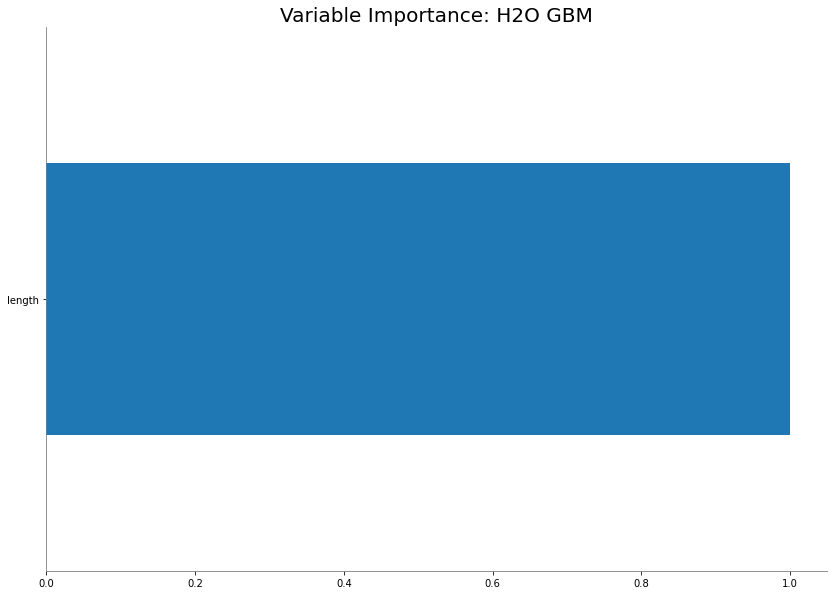

In [0]:
gbm_baseline.varimp_plot()

### Tweak the text data
The accuracy was not as expected. So before proceeding for any hyper parameters tuning we want to do some natural language processing, so that the training text is free of all the unwanted characters and are tokenized with natural language techniques

### Tokenize Words in Review¶
Our first step will be to tokenize the words in the review column. We will do this by creating a function called tokenize. This will split the reviews into words and remove any stop words, small words, or words with numbers in them.

In [0]:
def tokenize(sentences, stop_word = STOPWORDS):
    tokenized = sentences.tokenize("\\W+")
    tokenized_lower = tokenized.tolower()
    tokenized_filtered = tokenized_lower[(tokenized_lower.nchar() >= 2) | (tokenized_lower.isna()),:]
    tokenized_words = tokenized_filtered[tokenized_filtered.grep("[0-9]",invert=True,output_logical=True),:]
    tokenized_words = tokenized_words[(tokenized_words.isna()) | (~ tokenized_words.isin(STOPWORDS)),:]
    return tokenized_words

In [0]:
words = tokenize(df_h2o["text"])
words.head()

C1
house
dem
aide
didnt
even
see
comeys
letter
jason
chaffetz


### Train Word2Vec Model
Now that we've tokenized our words, we can train a <b>word2vec</b> model. We can use the find_synonms function to sanity check our word2vec model after training.

In [0]:
from h2o.estimators.word2vec import H2OWord2vecEstimator


w2v_model = H2OWord2vecEstimator(vec_size = 100, model_id = "w2v.hex")
w2v_model.train(training_frame=words)

word2vec Model Build progress: |██████████████████████████████████████████| 100%


In [0]:
w2v_model.find_synonyms("house", count = 5)

OrderedDict([('white', 0.7265527844429016),
             ('housethe', 0.655886173248291),
             ('vonlembke', 0.6401231288909912),
             ('houses', 0.6194923520088196),
             ('thenwhite', 0.6031650900840759)])

Now that we have a word embedding for each word in our vocabulary, we will aggregate the words for each review using the transform function. This will give us one aggregated word embedding for each review.



In [0]:
# Calculate a vector for each review
df_h2o_vecs = w2v_model.transform(words, aggregate_method = "AVERAGE")

In [0]:
df_h2o_vecs

C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,C40,C41,C42,C43,C44,C45,C46,C47,C48,C49,C50,C51,C52,C53,C54,C55,C56,C57,C58,C59,C60,C61,C62,C63,C64,C65,C66,C67,C68,C69,C70,C71,C72,C73,C74,C75,C76,C77,C78,C79,C80,C81,C82,C83,C84,C85,C86,C87,C88,C89,C90,C91,C92,C93,C94,C95,C96,C97,C98,C99,C100
0.0703071,0.044777,-0.0745844,0.0305485,-0.0714426,-0.0981024,-0.0668217,-0.0922481,0.189481,-0.0495971,0.0948435,-0.0355881,0.0826718,0.0485628,0.0532505,0.139157,-0.0050665,-0.139091,-0.00210109,0.0779076,-0.0712074,0.0617141,-0.138916,-0.0261456,-0.0184741,-0.0440677,0.0347119,-0.0448847,0.0770162,0.120964,-0.024981,0.202617,0.152761,0.0296153,-0.117787,-0.00813665,0.0564274,-0.132813,-0.16575,0.0650866,-0.0174824,-0.113845,-0.0788568,-0.0835391,-0.328269,0.0877159,-0.116371,0.131089,-0.0295988,0.195982,-0.016535,0.139804,-0.0532536,-0.0241282,0.189794,-0.0185551,-0.00742787,0.165249,-0.027361,-0.0198818,0.099034,0.0404699,0.00688874,-0.137087,-0.124502,0.0224432,-0.363474,0.102551,0.146499,-0.12202,-0.0480035,0.0773919,0.148364,-0.0421362,0.0866486,0.00427574,0.106636,0.0226183,0.0528583,0.143597,0.0294002,0.141723,-0.0581948,0.105443,0.0988548,0.0837716,0.0406259,0.10223,0.163312,0.0249875,-0.0490668,-0.160404,0.000376033,-0.00241394,-0.0140605,-0.0713743,-0.0736477,0.0455272,-0.0118661,0.0694605
0.109073,0.0347617,-0.0176976,0.035371,-0.143572,-0.156925,0.00388384,-0.0403038,0.147022,-0.00674731,0.0485051,-0.0600834,0.0173726,-0.0275589,0.0754702,0.0412573,0.0173652,-0.144251,-0.0412624,0.133851,-0.060218,-0.0301663,0.0318856,-0.074363,0.0609279,-0.00306648,0.0129788,-0.0227707,0.0829593,0.0422986,0.0186487,0.104267,0.12092,-0.0873926,-0.141548,-0.00328362,0.0157961,-0.0397229,-0.0991677,0.0386402,-0.00670316,-0.0693524,-0.0286269,-0.109167,-0.237553,-0.0141683,-0.122054,0.0833287,-0.0918959,0.0855024,-0.0422132,0.155091,-0.0878637,-0.0260142,0.0735571,-0.00926893,0.0697529,0.126181,0.0687119,0.0252324,0.0835484,0.0776189,0.0421968,-0.10959,-0.190098,0.00878984,-0.324536,0.0829912,0.186082,-0.108975,-0.0397635,0.117997,0.0849542,0.0559813,-0.0245813,-0.0599224,0.0072714,-0.0449841,0.0869026,0.06954,0.109112,0.0227134,-0.106694,0.0814946,-0.020519,0.0347646,0.0498255,0.164636,0.107957,0.0445038,-0.0336374,-0.0819368,0.135835,-0.0409849,0.000411264,-0.0210597,-0.0160836,-0.078284,-0.00243734,0.00792439
0.138116,0.0530768,0.0877199,0.034359,-0.097176,-0.0930106,0.0569569,-0.0350469,0.0526071,-0.0423756,0.024427,-0.00938841,0.0299075,-0.026254,0.059352,0.0866797,-0.0365671,-0.177813,-0.0206926,0.124255,-0.0519985,0.0239268,0.0456558,0.0247828,0.0621522,0.00857164,-0.037271,-0.0657955,0.0480458,0.0521874,-0.00519286,0.114496,0.115452,-0.0433055,-0.169777,-0.0104326,-0.00018044,-0.0889198,-0.0276129,0.0388464,-0.0424781,-0.150432,-0.0782171,-0.0869416,-0.248163,0.014713,-0.159347,0.130692,0.0406505,0.0246996,-0.0691404,0.0913118,-0.0665464,-0.0601894,0.0182162,0.00986615,-0.0088962,0.134284,-0.0137587,0.0412996,0.124655,0.0180188,0.0255874,-0.125507,-0.16736,-0.0038951,-0.265155,0.166488,0.258493,-0.203472,-0.0711819,0.110503,0.15297,0.0336363,-0.123054,-0.0463989,0.0668585,-0.0808554,0.104949,-0.00987748,0.0518693,-0.00789385,-0.108941,0.0162281,-0.0464501,0.0715737,0.039608,0.142012,0.0528186,0.0636141,-0.0355842,-0.133099,0.0677329,0.0242289,-0.0614122,-0.0150937,0.0031073,-0.046582,0.0536096,-0.0215838
0.140947,0.00712421,0.0334936,-0.0843437,-0.0446588,-0.060759,0.110575,-0.0939169,0.095208,-0.0674785,0.0842193,0.00492611,0.103937,0.00126557,0.0186149,0.0190158,-0.0984765,-0.214065,-0.00882541,0.0933808,-0.136535,-0.00798242,0.0360488,0.029198,0.180252,0.0574367,-0.106713,-0.170507,0.0150033,0.0432057,0.020954,0.171736,0.0673502,0.0246961,-0.0542799,0.0726603,0.0259393,-0.185776,-0.0527286,0.00782687,0.0856214,-0.319836,0.0116708,-0.226908,-0.192366,-0.0568947,-0.0783025,0.118505,-0.0837622,0.00395956,-0.174732,0.149928,0.0774037,-0.1774

In [0]:
# Add aggregated word embeddings 
ext_df_h2o = df_h2o.cbind(df_h2o_vecs)

In [0]:
ext_train = ext_df_h2o[ext_df_h2o["Train"] == "Yes"]
ext_test = ext_df_h2o[ext_df_h2o["Train"] == "No"]

In [0]:
predictors = predictors + df_h2o_vecs.names
response = 'label'

gbm_embeddings = H2OGradientBoostingEstimator(stopping_metric = "AUC", stopping_tolerance = 0.001,
                                              score_tree_interval = 10,
                                              model_id = "gbm_embeddings.hex"
                                             )
gbm_embeddings.train(x = predictors, y = response, 
                   training_frame = ext_train, validation_frame = ext_test
                  )

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [0]:
gbm_embeddings.confusion_matrix()


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.29175487852247445: 


,,0,1,Error,Rate
0,0,9825.0,10443.0,0.5152,(10443.0/20268.0)
1,1,837.0,10573.0,0.0734,(837.0/11410.0)
2,Total,10662.0,21016.0,0.3561,(11280.0/31678.0)


In [0]:
gbm_embeddings.auc()

0.7489235718151529

<b>After cleaning the text and performing word2vec we see a decent improve in the auc score by 20%

### Hyper-parameter tuning

We used the <b>grid search</b> for tuning the hyper-parameters

In [0]:
from h2o.grid.grid_search import H2OGridSearch

#hyper_params = {'max_depth' : range(1,30,2)}
hyper_params = {'max_depth' : [8,12,20]} ##faster for larger datasets

#Build initial GBM Model
gbm_grid1 = H2OGradientBoostingEstimator(
        ## more trees is better if the learning rate is small enough 
        ## here, use "more than enough" trees - we have early stopping
        ntrees=10000,
        ## smaller learning rate is better
        ## since we have learning_rate_annealing, we can afford to start with a 
        #bigger learning rate
        learn_rate=0.05,
        ## learning rate annealing: learning_rate shrinks by 1% after every tree 
        ## (use 1.00 to disable, but then lower the learning_rate)
        learn_rate_annealing = 0.99,
        ## sample 80% of rows per tree
        sample_rate = 0.8,
        ## sample 80% of columns per split
        col_sample_rate = 0.8,
        ## fix a random number generator seed for reproducibility
        seed = 1234,
        ## score every 10 trees to make early stopping reproducible 
        #(it depends on the scoring interval)
        score_tree_interval = 10, 
        ## early stopping once the validation AUC doesn't improve by at least 0.01% for 
        #5 consecutive scoring events
        stopping_rounds = 5,
        stopping_metric = "AUC",
        stopping_tolerance = 1e-4,
        model_id = "gbm_grid.hex"    )

#Build grid search with previously made GBM and hyper parameters
gbm_gridSearch = H2OGridSearch(gbm_grid1,hyper_params,
                         grid_id = 'depth_grid1',
                         search_criteria = {'strategy': "Cartesian"})


#Train grid search
gbm_gridSearch.train(x=predictors, 
           y=response,
           training_frame = ext_train, validation_frame = ext_test)

gbm Grid Build progress: |████████████████████████████████████████████████| 100%


In [0]:
print (gbm_baseline)

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  gbm_baseline.hex


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,16741.0,0.0,5.0,4.06,1.0,32.0,21.92




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.2236626016035098
RMSE: 0.4729298062117779
LogLoss: 0.6384174096410937
Mean Per-Class Error: 0.4247633291458004
AUC: 0.603069951605541
AUCPR: 0.44222898854891607
Gini: 0.206139903211082

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2731903208880132: 


,,0,1,Error,Rate
0,0,4079.0,16189.0,0.7987,(16189.0/20268.0)
1,1,1191.0,10219.0,0.1044,(1191.0/11410.0)
2,Total,5270.0,26408.0,0.5486,(17380.0/31678.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.273190,0.540430,314.0
1,max f2,0.207624,0.738919,394.0
2,max f0point5,0.361684,0.455178,170.0
3,max accuracy,0.473079,0.640950,7.0
4,max precision,0.595283,0.756757,0.0
5,max recall,0.177975,1.000000,399.0
6,max specificity,0.595283,0.999556,0.0
7,max absolute_mcc,0.361684,0.144623,170.0
8,max min_per_class_accuracy,0.361684,0.573357,170.0
9,max mean_per_class_accuracy,0.361684,0.575237,170.0



Gains/Lift Table: Avg response rate: 36.02 %, avg score: 36.02 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010196,0.478894,1.512803,1.512803,0.544892,0.498051,0.544892,0.498051,0.015425,0.015425,51.280258,51.280258
1,,2,0.023865,0.473574,1.397786,1.446927,0.503464,0.473667,0.521164,0.484085,0.019106,0.034531,39.778607,44.692672
2,,3,0.035924,0.471905,1.366365,1.419884,0.492147,0.471984,0.511424,0.480023,0.016477,0.051008,36.636458,41.988389
3,,4,0.069291,0.470181,1.308056,1.366033,0.471145,0.470225,0.492027,0.475305,0.043646,0.094654,30.805639,36.603347
4,,5,0.102753,0.453663,1.293878,1.342536,0.466038,0.461053,0.483564,0.470664,0.043295,0.137949,29.387760,34.253571
5,,6,0.158059,0.433082,1.316858,1.333551,0.474315,0.441630,0.480328,0.460505,0.072831,0.210780,31.685826,33.355091
6,,7,0.200897,0.429838,1.196873,1.304407,0.431098,0.430009,0.469830,0.454002,0.051271,0.262051,19.687316,30.440702
7,,8,0.302513,0.416108,1.158316,1.255334,0.417210,0.424685,0.452155,0.444154,0.117704,0.379755,15.831624,25.533406
8,,9,0.400152,0.373427,1.158827,1.231786,0.417394,0.395211,0.443673,0.432212,0.113146,0.492901,15.882654,23.178580
9,,10,0.500032,0.361413,1.033668,1.192212,0.372314,0.366556,0.429419,0.419097,0.103243,0.596144,3.366765,19.221220




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.2091282310026076
RMSE: 0.4573054023326289
LogLoss: 0.6175758898574257
Mean Per-Class Error: 0.5
AUC: 0.5
AUCPR: 0.2755269468635618
Gini: 0.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.17797499871796357: 


,,0,1,Error,Rate
0,0,0.0,5740.0,1.0,(5740.0/5740.0)
1,1,0.0,2183.0,0.0,(0.0/2183.0)
2,Total,0.0,7923.0,0.7245,(5740.0/7923.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.177975,0.432021,0.0
1,max f2,0.177975,0.655359,0.0
2,max f0point5,0.177975,0.322214,0.0
3,max accuracy,0.177975,0.275527,0.0
4,max precision,0.177975,0.275527,0.0
5,max recall,0.177975,1.000000,0.0
6,max specificity,0.177975,0.000000,0.0
7,max absolute_mcc,0.177975,0.000000,0.0
8,max min_per_class_accuracy,0.177975,0.000000,0.0
9,max mean_per_class_accuracy,0.177975,0.500000,0.0



Gains/Lift Table: Avg response rate: 27.55 %, avg score: 17.80 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,1.0,0.177975,1.0,1.0,0.275527,0.177975,0.275527,0.177975,1.0,1.0,0.0,0.0




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-04-24 04:55:18,0.012 sec,0.0,0.480054,0.653526,0.500000,0.360187,1.000000,0.639813,0.454730,0.604884,0.5,0.275527,1.0,0.724473
1,,2020-04-24 04:55:18,0.458 sec,10.0,0.474669,0.642221,0.595972,0.436661,1.519128,0.555938,0.446846,0.588827,0.5,0.275527,1.0,0.724473
2,,2020-04-24 04:55:19,0.857 sec,20.0,0.473629,0.639947,0.599032,0.439335,1.512803,0.566450,0.447117,0.589455,0.5,0.275527,1.0,0.724473
3,,2020-04-24 04:55:19,1.259 sec,30.0,0.473234,0.639077,0.601057,0.440920,1.512803,0.566040,0.450060,0.596778,0.5,0.275527,1.0,0.724473
4,,2020-04-24 04:55:19,1.655 sec,40.0,0.472967,0.638504,0.602847,0.442144,1.512803,0.549435,0.457254,0.617416,0.5,0.275527,1.0,0.724473
5,,2020-04-24 04:55:20,1.925 sec,50.0,0.472930,0.638417,0.603070,0.442229,1.512803,0.548646,0.457305,0.617576,0.5,0.275527,1.0,0.724473



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,length,1137.999146,1.0,1.0


In [0]:
print(gbm_embeddings)

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  gbm_embeddings.hex


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,22887.0,5.0,5.0,5.0,30.0,32.0,31.76




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.18794495840172346
RMSE: 0.433526191136964
LogLoss: 0.5450862926028768
Mean Per-Class Error: 0.29302730786946585
AUC: 0.7489235718151529
AUCPR: 0.5571414202829504
Gini: 0.4978471436303058

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.29175487852247445: 


,,0,1,Error,Rate
0,0,9825.0,10443.0,0.5152,(10443.0/20268.0)
1,1,837.0,10573.0,0.0734,(837.0/11410.0)
2,Total,10662.0,21016.0,0.3561,(11280.0/31678.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.291755,0.652131,240.0
1,max f2,0.218414,0.804193,281.0
2,max f0point5,0.388921,0.563527,183.0
3,max accuracy,0.465247,0.672612,128.0
4,max precision,0.886300,1.000000,0.0
5,max recall,0.054929,1.000000,385.0
6,max specificity,0.886300,1.000000,0.0
7,max absolute_mcc,0.281728,0.418463,245.0
8,max min_per_class_accuracy,0.432771,0.668838,152.0
9,max mean_per_class_accuracy,0.317195,0.706973,226.0



Gains/Lift Table: Avg response rate: 36.02 %, avg score: 36.03 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010007,0.606088,1.900521,1.900521,0.684543,0.653820,0.684543,0.653820,0.019018,0.019018,90.052060,90.052060
1,,2,0.020014,0.591565,1.760390,1.830455,0.634069,0.598256,0.659306,0.626038,0.017616,0.036635,76.039005,83.045533
2,,3,0.030084,0.582684,1.662321,1.774175,0.598746,0.586592,0.639035,0.612834,0.016740,0.053374,66.232063,77.417519
3,,4,0.040059,0.575660,1.669316,1.748064,0.601266,0.579501,0.629630,0.604534,0.016652,0.070026,66.931628,74.806375
4,,5,0.050066,0.570660,1.576469,1.713766,0.567823,0.573113,0.617276,0.598254,0.015776,0.085802,57.646870,71.376638
5,,6,0.100006,0.550323,1.582968,1.648450,0.570164,0.560053,0.593750,0.579177,0.079053,0.164855,58.296812,64.844982
6,,7,0.150041,0.534121,1.522168,1.606338,0.548265,0.542360,0.578582,0.566900,0.076161,0.241017,52.216811,60.633821
7,,8,0.200044,0.519207,1.479311,1.574586,0.532828,0.526690,0.567145,0.556849,0.073970,0.314987,47.931063,57.458633
8,,9,0.300019,0.489741,1.439452,1.529556,0.518472,0.504251,0.550926,0.539322,0.143909,0.458896,43.945204,52.955578
9,,10,0.399994,0.452950,1.398250,1.496737,0.503631,0.472106,0.539105,0.522522,0.139790,0.598685,39.824970,49.673703




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.1556226311275332
RMSE: 0.3944903435162047
LogLoss: 0.4614273542675275
Mean Per-Class Error: 0.2353883588898058
AUC: 0.8056954595296886
AUCPR: 0.5107063370522074
Gini: 0.6113909190593771

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.24458352780794373: 


,,0,1,Error,Rate
0,0,3633.0,2107.0,0.3671,(2107.0/5740.0)
1,1,233.0,1950.0,0.1067,(233.0/2183.0)
2,Total,3866.0,4057.0,0.2953,(2340.0/7923.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.244584,0.625000,227.0
1,max f2,0.183173,0.778774,265.0
2,max f0point5,0.333698,0.542898,173.0
3,max accuracy,0.458108,0.736211,86.0
4,max precision,0.601245,0.600000,0.0
5,max recall,0.060956,1.000000,370.0
6,max specificity,0.601245,0.999652,0.0
7,max absolute_mcc,0.221788,0.474249,240.0
8,max min_per_class_accuracy,0.333698,0.730662,173.0
9,max mean_per_class_accuracy,0.221788,0.764612,240.0



Gains/Lift Table: Avg response rate: 27.55 %, avg score: 26.57 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010223,0.568417,1.837108,1.837108,0.506173,0.581432,0.506173,0.581432,0.018781,0.018781,83.710829,83.710829
1,,2,0.020194,0.555021,1.975501,1.905440,0.544304,0.561236,0.525000,0.571460,0.019698,0.038479,97.550114,90.543976
2,,3,0.030292,0.546399,1.950807,1.920562,0.537500,0.550110,0.529167,0.564343,0.019698,0.058177,95.080738,92.056230
3,,4,0.040136,0.538352,1.861235,1.906010,0.512821,0.542736,0.525157,0.559043,0.018323,0.076500,86.123542,90.601042
4,,5,0.050107,0.532358,1.883617,1.901554,0.518987,0.534902,0.523929,0.554239,0.018781,0.095282,88.361737,90.155437
5,,6,0.100088,0.503536,1.952182,1.926836,0.537879,0.517529,0.530895,0.535907,0.097572,0.192854,95.218215,92.683634
6,,7,0.150196,0.479980,1.938123,1.930602,0.534005,0.492136,0.531933,0.521304,0.097114,0.289968,93.812273,93.060163
7,,8,0.200177,0.452803,1.878861,1.917683,0.517677,0.466077,0.528373,0.507515,0.093907,0.383875,87.886076,91.768272
8,,9,0.300013,0.396486,1.812410,1.882651,0.499368,0.424985,0.518721,0.480052,0.180944,0.564819,81.241034,88.265098
9,,10,0.399975,0.330840,1.741383,1.847345,0.479798,0.365220,0.508993,0.451353,0.174072,0.738891,74.138314,84.734517




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-04-24 05:35:03,0.007 sec,0.0,0.480054,0.653526,0.500000,0.360187,1.000000,0.639813,0.454730,0.604884,0.500000,0.275527,1.000000,0.724473
1,,2020-04-24 05:35:06,3.125 sec,10.0,0.454202,0.597713,0.713974,0.521875,1.795423,0.397026,0.414759,0.520652,0.784132,0.491549,1.903227,0.325256
2,,2020-04-24 05:35:08,5.377 sec,20.0,0.444676,0.574642,0.728163,0.534705,1.842160,0.372972,0.403317,0.490751,0.795387,0.500121,1.792301,0.312634
3,,2020-04-24 05:35:10,7.397 sec,30.0,0.439395,0.560813,0.736994,0.543719,1.900521,0.368552,0.398169,0.475275,0.801198,0.505035,1.792301,0.307964
4,,2020-04-24 05:35:12,9.388 sec,40.0,0.436069,0.551927,0.743624,0.551252,1.923418,0.360945,0.395796,0.466743,0.803721,0.508060,1.881916,0.305566
5,,2020-04-24 05:35:14,11.373 sec,50.0,0.433526,0.545086,0.748924,0.557141,1.900521,0.356083,0.394490,0.461427,0.805695,0.510706,1.837108,0.295343



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,C43,1579.112061,1.000000,0.211560
1,C63,884.661438,0.560227,0.118521
2,length,528.383606,0.334608,0.070790
3,C29,386.287628,0.244623,0.051752
4,C90,281.323212,0.178153,0.037690
5,C84,242.946411,0.153850,0.032548
6,C67,192.592499,0.121963,0.025802
7,C26,186.795578,0.118292,0.025026
8,C7,162.731033,0.103052,0.021802
9,C69,161.308594,0.102151,0.021611



See the whole table with table.as_data_frame()



In [0]:
print(gbm_gridSearch)

    max_depth            model_ids              logloss
0           8  depth_grid1_model_1  0.45402084122317116
1          12  depth_grid1_model_2  0.45918977078572054
2          20  depth_grid1_model_3     0.48120246291119



In [0]:
sorted_grid = gbm_gridSearch.get_grid(sort_by='auc',decreasing=True)
print(sorted_grid)

    max_depth            model_ids                 auc
0          12  depth_grid1_model_2   0.811165826843793
1          20  depth_grid1_model_3  0.8105167663972955
2           8  depth_grid1_model_1  0.8099225724277398



<b>After tuning the hyper parameters the auc score increased by another 10%.

### Evaluation
We are using AUC as our metric to evaluate how well the model is performing. In this case we achieve a <b>AUC score of 81.01. 

### Predictions

Now we have build our model, so let us try predicting by inputing new data

To predict we will use some new tweets based on coronavirus and we can check if the model is predicting correctly

In [0]:
def predict(df_h2o, w2v, gbm):
    
    words = tokenize(df_h2o["text"].ascharacter())
    df_h2o_vec = w2v.transform(words, aggregate_method="AVERAGE")
    
    model_data = df_h2o.cbind(df_h2o_vec)
    print(gbm.predict(model_data))

In [0]:
Real_News = h2o.H2OFrame([[" DHS Under Secretary for Science William Bryan on how the  Coronavirus dies fast when exposed to higher temperatures",15],
                          [" New  Preliminary results of first large scale study of hydroxychloroquine   drug President Trump said would be a  game changer",18]])

Real_News.col_names = ["text","length"]

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [0]:
# Predict!
print("Real_news: ")
print(predict(Real_News, w2v_model, gbm_embeddings))

Real_news: 
gbm prediction progress: |████████████████████████████████████████████████| 100%


predict,p0,p1
1,0.714128,0.285872
0,0.79773,0.20227



None


In [0]:
# Predict!
print("Real_news: ")
print(predict(Real_News, w2v_model, gbm_gridSearch))

Real_news: 
gbm prediction progress: |████████████████████████████████████████████████| 100%
gbm prediction progress: |████████████████████████████████████████████████| 100%
gbm prediction progress: |████████████████████████████████████████████████| 100%


predict,p0,p1
1,0.732803,0.267197


predict,p0,p1
1,0.59683,0.40317


predict,p0,p1
1,0.62396,0.37604


{'depth_grid1_model_1': , 'depth_grid1_model_2': , 'depth_grid1_model_3': }
None


In [0]:
pred = predict(Real_News, w2v_model, gbm_embeddings)

gbm prediction progress: |████████████████████████████████████████████████| 100%


predict,p0,p1
1,0.714128,0.285872


##### Wow!! 
Looks like the model is predicting correctly. The <b>P0</b> score is the score for the Real news. If we remember, the label for real news was <b>0</b> and the fake news was <b>1</b>. SO the Model is predicting correctly. 

The two tweets that we passed were tweets and were real and the model was able to classify the tweets to be real

We will be using pickel to store the model for future use

In [0]:
#Pickling
gbm_embedd_pkl_filename = r'/content/drive/My Drive/Colab Notebooks/gbm_embeddings.pickel'
gbm_embeddings_pkl = open(gbm_embedd_pkl_filename, 'wb')
pickle.dump(gbm_embeddings, gbm_embeddings_pkl)
gbm_embeddings_pkl.close()

## Evaluation Metric:
#### Confusion Matrix:
A confusion matrix is a summary of prediction results on a classification problem.<br> The number of correct and incorrect predictions are summarized with count values and broken down by each class.<br> This is the key to the confusion matrix. <br>The confusion matrix shows the ways in which your classification model is confused when it makes predictions.<br> It gives us insight not only into the errors being made by a classifier but more importantly the types of errors that are being made.<br>

<b>Definition of the Terms:</b>
1. Positive (P) : Observation is positive (for example: is an apple).
2. Negative (N) : Observation is not positive (for example: is not an apple).
3. True Positive (TP) : Observation is positive, and is predicted to be positive.
4. False Negative (FN) : Observation is positive, but is predicted negative.
5. True Negative (TN) : Observation is negative, and is predicted to be negative.
6. False Positive (FP) : Observation is negative, but is predicted positive.
    Accuracy: (TP+ TN)/ (TP+TN+FP+FN)
    Precision: (TP)/(TP+FP)
    Recall: (TP)/(TP+FN)

<br>
<b>AUC</b>: AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. <br>
<b>ROC</b> is a probability curve and <b>AUC</b> represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s.

## Conclusion:

We have executed 4 models on the cleaned dataset that consists of tweets/articles from twitter as well.<br> <br>
<b>The 4 models are :</b>
1. Naive Bayes Classifier
2. PassiveAgresiveClassifier
3. Long Short Term Memory (LSTM)
4. H2O AutoML
		
<b>Naive Bayes Classifier</b> and <b>PassiveAggresiveClassifier </b> did not perform well on our dataset attaining an accuracy of <b>65-68%</b> on the confusion matrix even after vectorizing the words. Hence, we use <b>LSTM</b> to see how a Recurrent Neural Network model performs. After executing the model on the same dataset, we achieved an accuracy of <b>94%</b> on training data and <b>93%</b> on validation data. Hence, we run the LSTM model on twitter dataframe and store it as a csv to cross validate. LSTM model attains a good accuracy although it is quite expensive on the system. Takes up most of the system's resources to attain a good accuracy. Hence we use <b>H2O AutoML model</b> which is less expensive on the system and also helps us attain a <b>AUC of 81%</b>

## License
Copyright 2020 <b>ANURAG DHAR & PRITHVIRAJ PATIL</b>

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:<br>
The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.<br>
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.


## Citation

1. https://machinelearningmastery.com/5-step-life-cycle-long-short-term-memory-models-keras/
2. https://colah.github.io/posts/2015-08-Understanding-LSTMs/
3. https://colah.github.io/posts/2015-08-Understanding-LSTMs/
4. http://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/intro.html
5. https://www.kaggle.com/jsvishnuj/fakenews-detection-using-lstm-neural-network
6. https://github.com/nikbearbrown/H2O_Workshop/blob/master/AmazonReviews.ipynb
7. https://www.techopedia.com/definition/14650/data-preprocessing
8. https://towardsdatascience.com/naive-bayes-document-classification-in-python-e33ff50f937e
9. https://machinelearningmastery.com/5-step-life-cycle-long-short-term-memory-models-keras/
10. https://towardsdatascience.com/https-medium-com-piercarlo-slavazza-what-is-the-best-method-for-automatic-text-classification-a01d4dfadd